In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("heart_2020_cleaned.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319785 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

### Standarisasi dataset

In [14]:
from sklearn.preprocessing import StandardScaler,OrdinalEncoder

enc = OrdinalEncoder()
df[["Smoking","Diabetic","Asthma"]] = enc.fit_transform(df[["Smoking","Diabetic","Asthma"]])

std = StandardScaler()
df[["PhysicalHealth", "MentalHealth"]] = std.fit_transform(df[["PhysicalHealth", "MentalHealth"]])

### Split Data Classification

In [4]:
from sklearn.model_selection import train_test_split

x = df[["Smoking","Diabetic","Asthma"]]
y = df["HeartDisease"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## Classification
### Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier().fit(x_train, y_train)
predict_tree = tree.predict(x_test)
print("Decision Tree akurasi : ", accuracy_score(y_test, predict_tree)*100,"%")

Decision Tree akurasi :  91.48360668553292 %


### KNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=5).fit(x_train, y_train)
predict_knn = knn.predict(x_test)
print("KNN akurasi :", accuracy_score(y_test, predict_knn)*100, "%")

KNN akurasi : 91.48360668553292 %


### Naive Bayes

In [21]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB().fit(x_train, y_train)
predict_nb = nb.predict(x_test)
print("Naive Bayes akurasi : ", accuracy_score(y_test, predict_nb)*100,"%")

Naive Bayes akurasi :  89.47919761096954 %


## Split Data Regression

In [11]:
df.corr()

C:\Users\sasko\AppData\Local\Temp\ipykernel_13920\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,BMI,Smoking,PhysicalHealth,MentalHealth,Diabetic,SleepTime,Asthma
BMI,1.000000,0.023132,0.109790,0.064158,0.163441,-0.051831,0.092367
Smoking,0.023132,1.000000,0.115352,0.085157,0.038993,-0.030336,0.024149
PhysicalHealth,0.109790,0.115352,1.000000,0.287987,0.111644,-0.061387,0.117907
MentalHealth,0.064158,0.085157,0.287987,1.000000,0.029970,-0.119717,0.114008
Diabetic,0.163441,0.038993,0.111644,0.029970,1.000000,-0.005166,0.044136
SleepTime,-0.051831,-0.030336,-0.061387,-0.119717,-0.005166,1.000000,-0.048245
Asthma,0.092367,0.024149,0.117907,0.114008,0.044136,-0.048245,1.000000


### Linear Regression

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error

x=np.array(df[['PhysicalHealth']])
y=np.array(df.MentalHealth)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

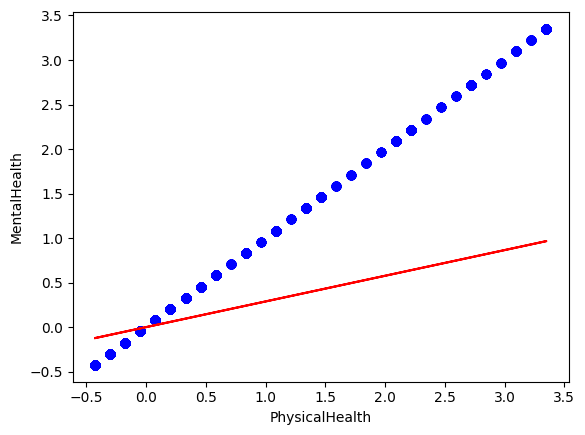

MAE  :  0.6395290109312299
RMSE :  0.9584357966931972


In [30]:
from sklearn.linear_model import LinearRegression

model_linear=LinearRegression().fit(x_train,y_train)
predict_linear=model_linear.predict(x_test)
plt.scatter(x_test,x_test,color="blue")
plt.plot(x_test,predict_linear,color="red")
plt.xlabel("PhysicalHealth")
plt.ylabel("MentalHealth")
plt.show()
print("MAE  : ",mean_absolute_error(predict_linear,y_test))
print("RMSE : ",np.sqrt(mean_squared_error(predict_linear,y_test)))